<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
data = pd.read_csv('DMV_Written_Tests.csv')

In [4]:
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
scores = data[['DMV_Test_1', 'DMV_Test_2']].values
results = data[['Results']].values

In [7]:
print(scores)

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

### Task 3: Visualize the Data
---

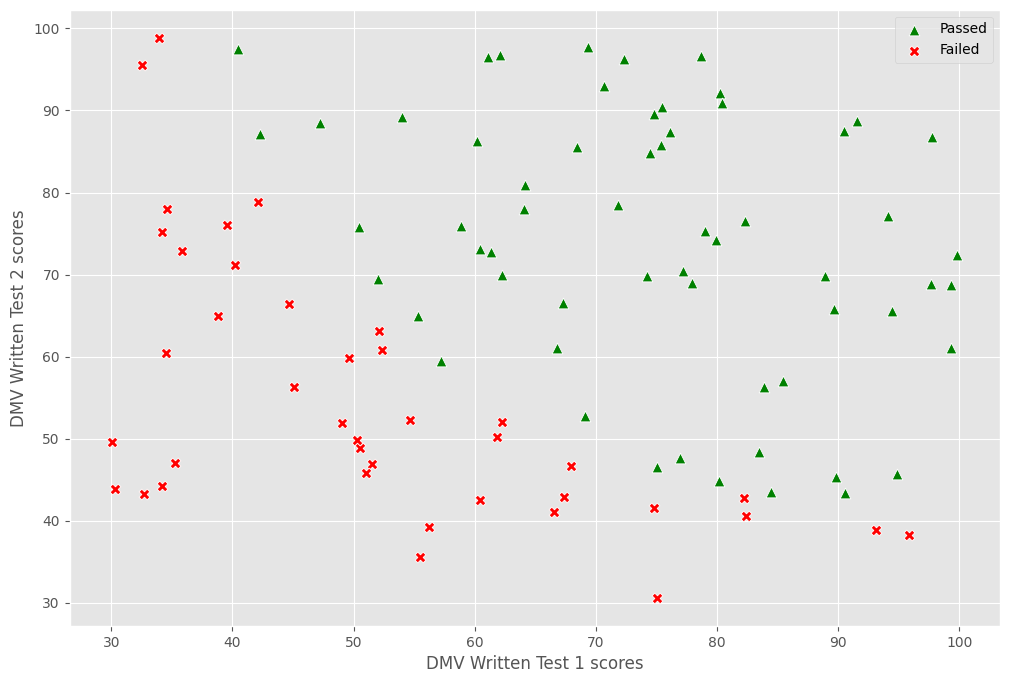

In [8]:
passed = (results == 1).reshape(100,1)
failed = (results == 0).reshape(100,1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = '^',
                     color = 'green',
                     s = 60)

ax = sns.scatterplot(x = scores[failed[:, 0], 0],
                     y = scores[failed[:, 0], 1],
                     marker = 'X',
                     color = 'red',
                     s = 60)

ax.set(xlabel="DMV Written Test 1 scores", ylabel="DMV Written Test 2 scores")
ax.legend(['Passed', 'Failed'])
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [9]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [10]:
def compute_cost(theta, x, y):
    m = len(y)
    y_pred = logistic_function(np.dot(x, theta))
    error = (y * np.log(y_pred)) + (1 - y) * np.log(1 - y_pred)
    cost = -1/m * sum(error)

    gradient = 1/m * np.dot(x.transpose(), (y_pred - y))

    return cost[0], gradient

### Task 6: Cost and Gradient at Initialization
---

In [11]:
mean_scores  = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)

scores = (scores - mean_scores) / std_scores

rows =  scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1)
y = results.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))

cost, gradient = compute_cost(theta_init, X, y)

print(f"Cost at initialization: {cost}")
print(f"Gradient at initialization: {gradient}")

Cost at initialization: 0.693147180559946
Gradient at initialization: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [12]:
def gradient_descent(x, y, theta, alpha=1, iterations=200):
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs

In [13]:
theta, costs = gradient_descent(X, y, theta_init, alpha=1, iterations=500)

In [14]:
print(f"Theta after running gradient descent: {theta}")
print(f"Optimized cost: {costs[-1]}")

Theta after running gradient descent: [[1.6860838 ]
 [3.92373195]
 [3.65831667]]
Optimized cost: 0.2035282854733038


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of cost functions vs iterations of gradient descent')

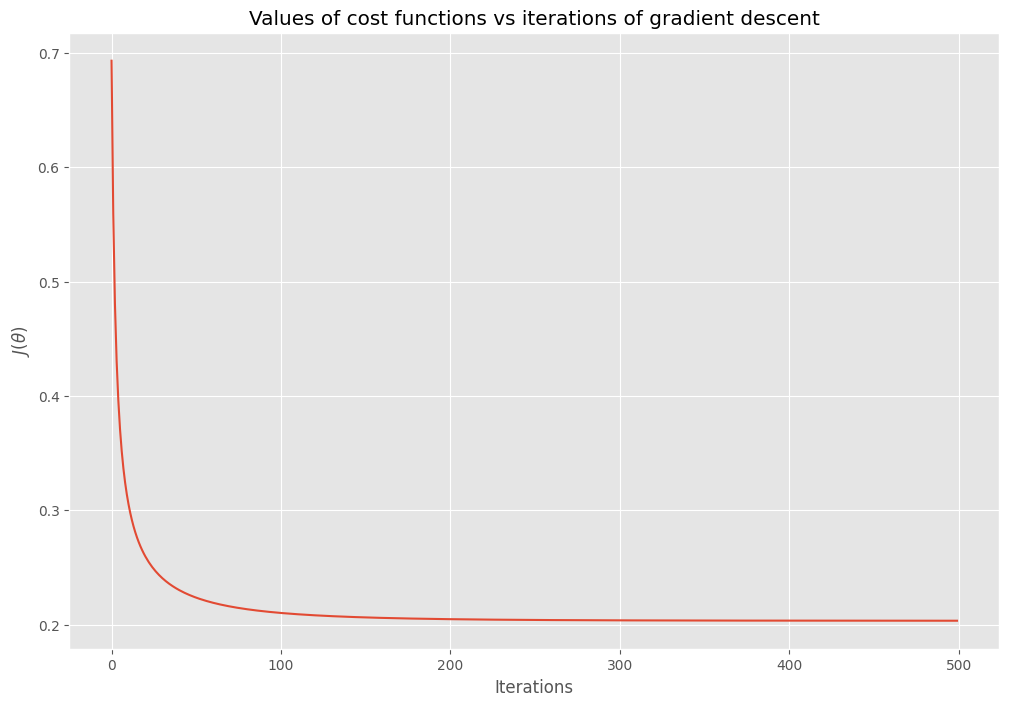

In [15]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J( \\theta )$")
plt.title("Values of cost functions vs iterations of gradient descent")

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1" 

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us 

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

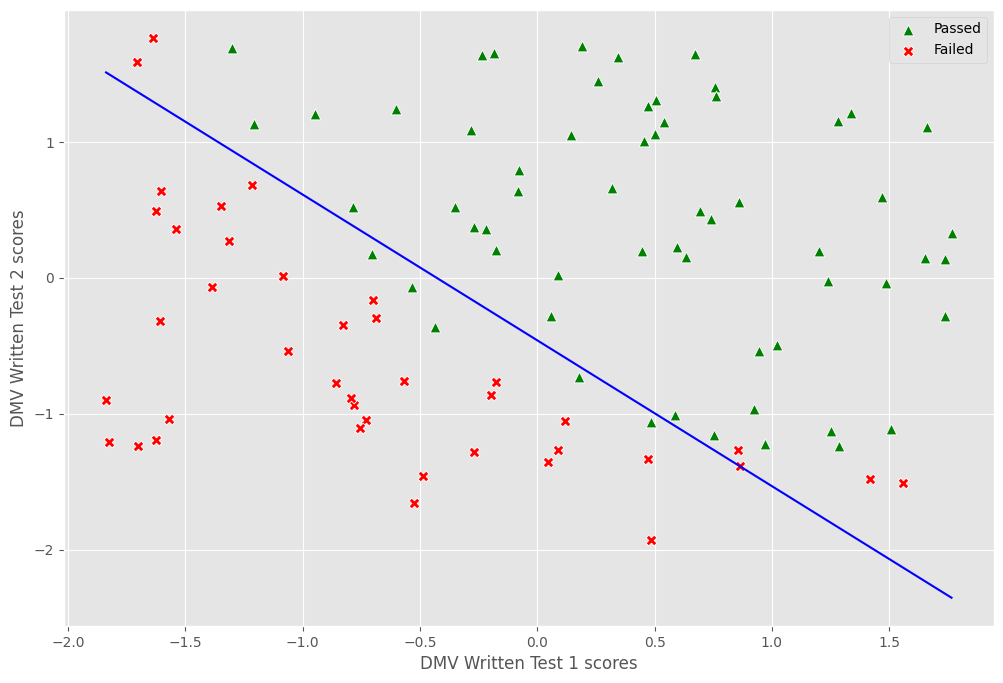

In [17]:
ax = sns.scatterplot(x = X[passed[:, 0], 1],
                     y = X[passed[:, 0], 2],
                     marker = '^',
                     color = 'green',
                     s = 60)

sns.scatterplot(x = X[failed[:, 0], 1],
                     y = X[failed[:, 0], 2],
                     marker = 'X',
                     color = 'red',
                     s = 60)

ax.legend(['Passed', 'Failed'])
ax.set(xlabel="DMV Written Test 1 scores", ylabel="DMV Written Test 2 scores")

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary)/ theta[2]

sns.lineplot(x=x_boundary, y=y_boundary, color='blue')
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [18]:
def predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [19]:
p = predict(theta, X)
print(f"Training accuracy: {sum(p==y)[0]}%")

Training accuracy: 89 %


In [21]:
test = np.array([50,  79])
test = (test - mean_scores)/std_scores
test = np.append(np.ones(1), test)

probability = logistic_function(test.dot(theta))

print(f"Person with scores 50 and 79 have a {np.round(probability[0],2)* 100}% probability of passing.")

Person with scores 50 and 79 have a 74.0% probability of passing.
